# Part 1

Reading the Scientific article and Recording voice so that we can have audio data to be used in further stages.

# Part 2

Vizualizing and Analyzing the Audio File

In [1]:
#Importing Necessary Libraries
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio
from scipy.io import wavfile

In [2]:
#Loading the file on an object
AudioFile = wavfile.read("Article.wav")

In [3]:
#Separeting the object elements
FrameRate = AudioFile[0]
SoundData = AudioFile[1]

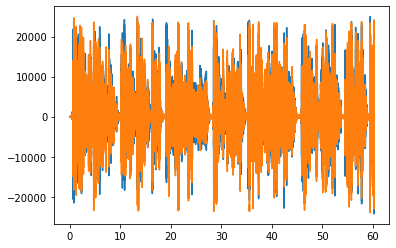

In [4]:
#Vizualizing the Audio file
t = np.linspace(0, len(SoundData)/FrameRate, len(SoundData))
plt.plot(t, SoundData)
plt.show()

**Analyzing Audio File**

As we see, we have 2 different colors in our plot. It is because of the recording type of the audio. It has 2 dimensions in each entry of SoundData that makes plot have two different colors. However, such cases does not make any problem for playing or vizualizing the audio as you see.

# Part 3

Creating Graphical User Interface for users to add comments on audio file when it is playing

In [3]:
#Creating the initial json file
import json

In [6]:
#Opening new json file in write mode
JSONFile = open("AudioJson.json", "w")
#Creating some random data to it so that when we read it, the file has a already dictionary in it. It will help us easily 
#store seconds/minutes as keys and comments as values.
dictionary = {" " : 2}
#Adding the dictionary to newly created json file
json.dump(dictionary, JSONFile, indent = 6)

#NOTE: DO NOT Run this cell unless you want clear the json file and bring it to its initial situation.

In [1]:
from tkinter import *
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio
from scipy.io import wavfile
from pygame import mixer
import matplotlib
matplotlib.use('TkAgg')
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from matplotlib.figure import Figure
import pygame
import json

#Creating the AUDIO class. Most of the processes of the project happen here.
class AUDIO:
    #Creating constructor of the class. Here, we initialize lots of buttons, labels, and also the window itself.
    def __init__(self, window):
        #Initializing window
        self.window = window
        #Initializing button to graph the plot of the audio and locate=ing it using grid
        self.graphit = Button(window, text = "Graph Audio", command = self.graph)
        self.graphit.grid(row = 0, column = 0, pady = 10)
        #Initializing play and stop audio button and locating them using grid
        self.playAudio = Button(window, text = "Initialize and Play Audio", command = self.initializePlay)
        self.playAudio.grid(row = 0, column = 1, pady = 10, padx = 148)
        self.stopAudio = Button(window, text = "Stop and Initialize Audio", command = self.initializeStop)
        self.stopAudio.grid(row = 1, column = 1, pady = 10, padx = 148)
        #Initializing pause and unpause button and locating them by grid
        self.pause = Button(window, text = "Pause Audio", command = self.pause)
        self.pause.grid(row = 0, column = 2, pady = 10)
        self.unpause = Button(window, text = "Unpause Audio", command = self.unpause)
        self.unpause.grid(row = 1, column = 2, pady = 10)
        #Next, we initialize comment entry for user to enter his/her comment
        self.commentEntry = Entry(window, width = 30)
        self.commentEntry.grid(row = 2, column = 1, pady = 10)
        #Initially, we make this entry disabled so that we can enable it manually and stop everything while commenting
        self.commentEntry.config(state = 'disabled')
        #Binding button for comment entry and locating it
        self.controlEntry = Button(window, text = "Comment", command = self.buttonFunctionClick)
        self.controlEntry.grid(row = 3, column = 1, pady = 10)
        #Binding "Enter" keyboard to the same entry comment so that we can comment both by enter keyword and also clicking on the button itself
        self.window.bind('<Return>', self.buttonFunctionKey)
        #Creating button to disable/enable comment comment entry and locating it.
        self.wantComment = Button(window, text = "Press for Comment", command = self.makeNormalEntry)
        self.wantComment.grid(row = 1, column = 0)
        #Creating button to store comments in json file and locating it
        self.storeComments = Button(window, text = "Store Comments", command = self.storeComment)
        self.storeComments.grid(row = 3, column = 0)
        #Creating label for displaying the comments. Below, this label will be changed by the comments and then we locate it using grid function
        self.label = Label(window, text = "Comments are Here")
        self.label.grid(row = 5, column = 1)
        #Creating two different boolean data types. These data types will control pausing/unpausing, displaying/nondisplaying
        #comments, etc.
        self.stateAudio = False
        self.commentState = False
        #Setting initial value to current_time which will later be changed and replaced with the ecaxt time of the audio. It
        #will help us store comments based on minutes or seconds.
        self.current_time = 0
        #Opening, reading, and closing json file. The content of the json file will be located in self.dict
        self.fileRead = open("AudioJson.json", "r")
        self.dict = json.load(self.fileRead)
        self.fileRead.close()
        self.fileNew = open("AudioJson.json", "r")
        self.newDict = json.load(self.fileNew)
        self.fileNew.close()
        #Initializing the mixer which is our audio player/stopper/pauser/unpauser
        mixer.init()
        #Loading the audio to mixer
        mixer.music.load('Article.wav')
    
    #Function for checking whether the audio is ended or not
    def checker(self):
        if not mixer.music.get_busy():
            self.stateAudio = False
        else:
            self.stateAudio = True
    
    #Function to draw the graph of the audio file
    def graph(self):
        #Reading the audio file
        AudioFile = wavfile.read("Article.wav")
        #Extracting frame rate and sound data of the read file
        FrameRate = AudioFile[0]
        SoundData = AudioFile[1]
        #Creating the x-axis for plotting
        t = np.linspace(0, SoundData.shape[0]/FrameRate, SoundData.shape[0])
        #Creating figure for plotting
        fig = plt.Figure(figsize = (6, 3))
        #Adding subplot to it
        a = fig.add_subplot(111)
        #Plotting the data
        a.plot(t, SoundData)
        #Creating our canvas in the window
        canvas = FigureCanvasTkAgg(fig, master = self.window)
        #Locating using grid and drawing it.
        canvas.get_tk_widget().grid(row = 4, column = 1)
        canvas.draw()
    
    #Function for loading json file in write format which is used to store new comments.
    def storeComment(self):
        #Open json file in write mode
        fileWrite = open("AudioJson.json", "w")
        #Dumping new comments with the old ones to the json file
        json.dump(self.newDict, fileWrite, indent = 6)
        #Closing the json file
        fileWrite.close()
    
    #This function will help us display the comments while playing the audio
    def displayComment(self):
        #We set some conditions to while loop which are as long as the audio is on and comment is not inten
        while mixer.music.get_busy():# and not self.commentState:
            #Iterate over dictionary keys which are the second/minutes of the audio that comments added
            for i in self.dict.keys():
                #Getting rid of manually creating data
                if i == " ":
                    continue
                #Checking if the minute in dictionary keys corresponds to some intervare in position audio
                elif (mixer.music.get_pos() - 30) <= int(i) and (mixer.music.get_pos() + 30) >= int(i):
                    #If above condition satisfies, or finds proper comment on some interval. We set new label which are 
                    #the comments
                    self.label.config(text = self.dict[i])
                    #And, updating the window to one by one vizualize the comments
                    window.update()
    
    #Function to initialize and stop the audio playing
    def initializePlay(self):
        #Playinh the music
        mixer.music.play()
        #Calling the displayComment function to show the already written comments while playing the audio
        self.displayComment()
        #Setting the State of the Audio to True which means audio is on
        self.stateAudio = True
    
    #Function to initialize and stop the audio playing
    def initializeStop(self):
        #Using mixer to stop the audio
        mixer.music.stop()
        #And, setting the State of the Audio to False which means audio is no longer on
        self.stateAudio = False
    
    #Function to pause the audio
    def pause(self):
        #Using mixer to pause the audio
        mixer.music.pause()
    
    #Function to unpause the audio
    def unpause(self):
        #Using mixer to unpause the audio
        mixer.music.unpause()
        #Setting State of the Audio to True because when we pause the audio get_busy() (Function that shows if the audio is 
        #ended or not) function is turned to False which is not desirable because we did not finish the audio just paused.
        self.stateAudio = True
        #Calling the displayComment function to show the already written comments while playing the audio
        self.displayComment()
    
    #It is the function of "Press for comment" button for Clicking
    def buttonFunctionClick(self):
        #Getting the text from the entry
        text = self.commentEntry.get()
        #Adding it as a value to dictionary with the exact time as a key
        self.newDict[self.current_time] = text
        #Clearing the comment entry
        self.commentEntry.delete(0, END)
        #Then we set the state of the comment to False so that we continue to play the audio
        self.commentState = False
        #Unpausing the audio so that further comments are also acceptable
        mixer.music.unpause()
        #Calling the displayComment function to show the already written comments while playing the audio
        self.displayComment()
        #Disabling the comment entry
        self.commentEntry.config(state = 'disabled')
        return None
    
    #Again, It is the function of "Press for comment" button but for Enter key
    def buttonFunctionKey(self, event):
        #Getting the text from the entry
        text = self.commentEntry.get()
        #Adding it as a value to dictionary with the exact time as a key
        self.newDict[self.current_time] = text
        #Clearing the comment entry
        self.commentEntry.delete(0, END)
        #Then we set the state of the comment to False so that we continue to play the audio
        #self.commentState = False
        #Unpausing the audio so that further comments are also acceptable
        mixer.music.unpause()
        self.commentEntry.config(state = 'disabled')
        #Calling the displayComment function to show the already written comments while playing the audio
        self.displayComment()        
        return None
    
    #Function for making entry normal which we can comment on it
    def makeNormalEntry(self):
        #Changing state of the comment so that we can add comment
        #self.commentState = True
        #Calling checker function to check whether it the end of the audio or not
        self.checker()
        #If state of the audio is true
        if self.stateAudio:
            #Enable the comment entry
            self.commentEntry.config(state = 'normal')
            #Pausing the audio so that while we add a comment, we do not miss any further part of the audio
            mixer.music.pause()
            #When we pause, we need to get the exact time where we paused the audio to store the comment to corresponding
            #second or minute
            self.current_time = mixer.music.get_pos()

#Creating the tkinter window
window = Tk()
#Setting the title
window.title("AUDIO")
#Setting dimension of the window
window.geometry("700x500")
#Creating object from AUDIO class
AudioObject = AUDIO(window)
#Displaying the window
window.mainloop()

pygame 2.1.0 (SDL 2.0.16, Python 3.8.3)
Hello from the pygame community. https://www.pygame.org/contribute.html
